<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/HW2_SDaniels/shar_CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

Edited by Shar Daniels

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use

In [ ]:
#distributions = [ 'chisq', 'cauchy', 'lnorm']
distributions = ['gaus', 'pois', 'binomial', 'chisq', 'lnorm']


## and which *population* mean to give it (it will be the same for each distribution)

In [ ]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

In class aI used scipy.stats. You are free to use what you want!



In [ ]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

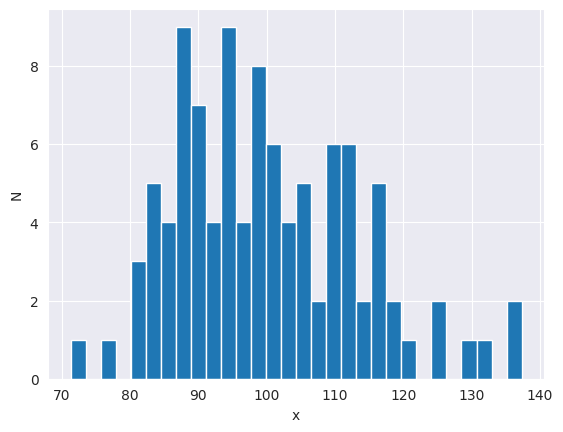

In [ ]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456) #WHY DO I DO THIS??
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000 - note that generally size > 30 is considered necessary for the theorem to hold). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [ ]:
np.log10(2000)

3.3010299956639813

In [ ]:
#mysize = (np.random.rand(100) * 1000).astype(int)
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
mysize = (np.logspace(1, 3.3, 100, base=10)).astype(int) #edited it from 4.3
#mysize....
print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


In [ ]:
mysize

array([  10,   10,   11,   11,   12,   13,   13,   14,   15,   16,   17,
         18,   19,   20,   21,   22,   23,   24,   26,   27,   29,   30,
         32,   34,   36,   38,   40,   42,   44,   47,   49,   52,   55,
         58,   61,   65,   68,   72,   76,   80,   84,   89,   94,   99,
        105,  111,  117,  123,  130,  137,  145,  153,  161,  170,  179,
        189,  199,  210,  222,  234,  247,  261,  275,  290,  306,  323,
        341,  360,  380,  400,  422,  446,  470,  496,  523,  552,  582,
        615,  648,  684,  722,  761,  803,  847,  894,  943,  995, 1050,
       1107, 1168, 1232, 1300, 1372, 1447, 1526, 1610, 1699, 1792, 1891,
       1995])

Text(0, 0.5, 'frequency')

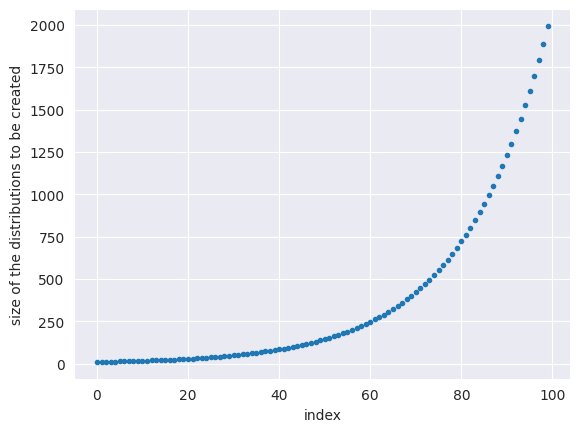

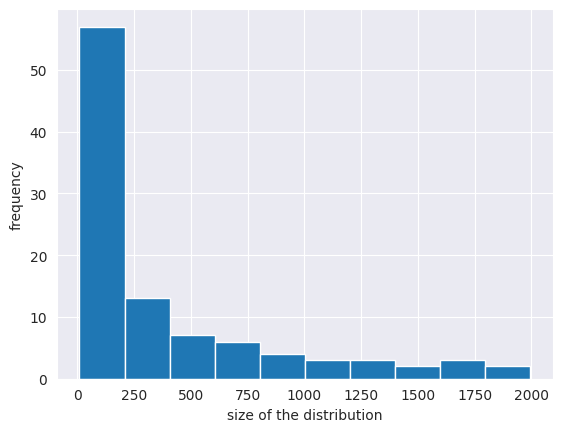

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

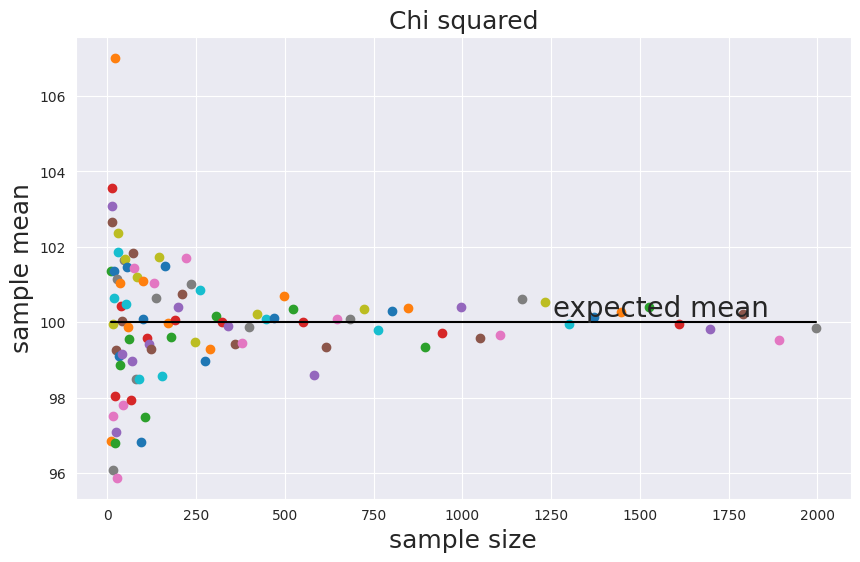

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

## Figure 2: This is a clear example of the law of large numbers because we can see that as the sample size increases, the sample mean is much closer to the expected mean (population mean).




# <mark>WFF</mark> Good caption.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0.5, 1.0, 'Distribution of sample means for Chi Squared distribution samples')

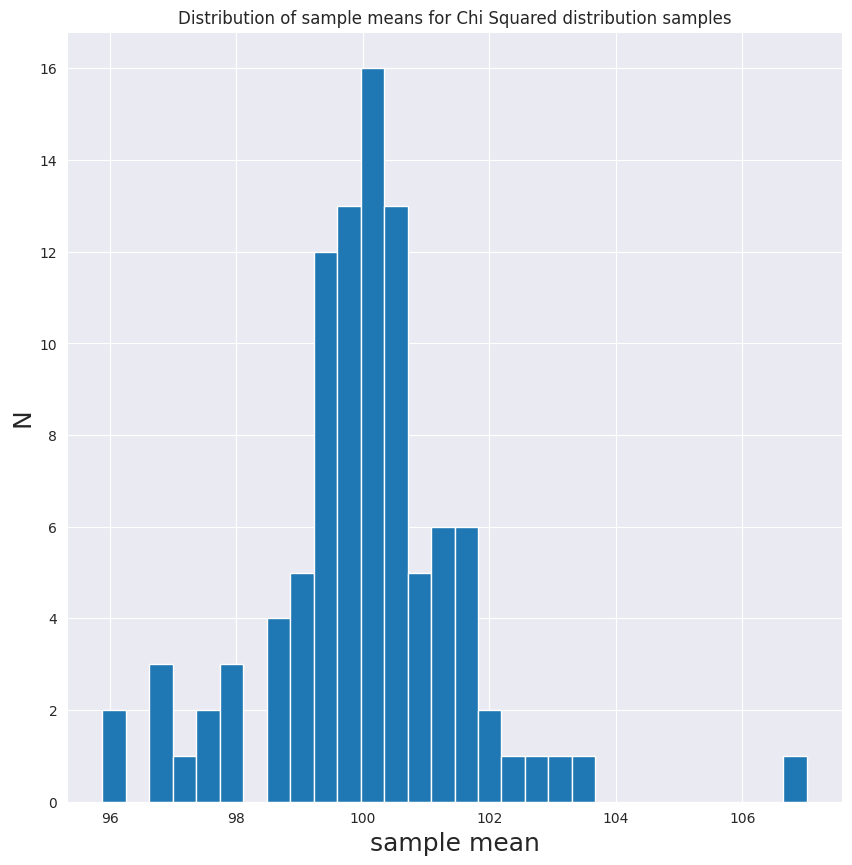

In [ ]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);
pl.title("Distribution of sample means for Chi Squared distribution samples")

## Figure 3: This shows that the sample means cluster around the population mean. This is a vaguely Gaussian shape (it could be more Gaussian but that's what it's supposed to be), so it shows the Central Limit Theorem - as the number of samples increases, the sample mean approaches a normal (gaussian) distribution with mean of the population mean.

# <mark>WFF</mark> Great caption.

# Do it for the Normal distribution


In [ ]:
#i think that changing the stdv will not have an effect here



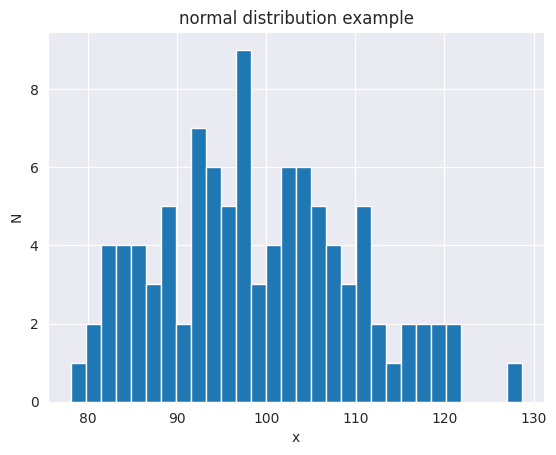

In [ ]:
mydists['gaus'] = {}


mydists['gaus'][100] = np.random.normal(loc=mymean, scale=10, size=100)

pl.hist(mydists['gaus'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title("normal distribution example");

In [ ]:
#checking the mean and stdv for this one
print ("Normal mean: %.2f, standard deviation: %.2f"%(mydists['gaus'][100].mean(), mydists['gaus'][100].std()))

Normal mean: 99.00, standard deviation: 10.83


In [ ]:
#i am going to use the same sizes of the distributions to be created

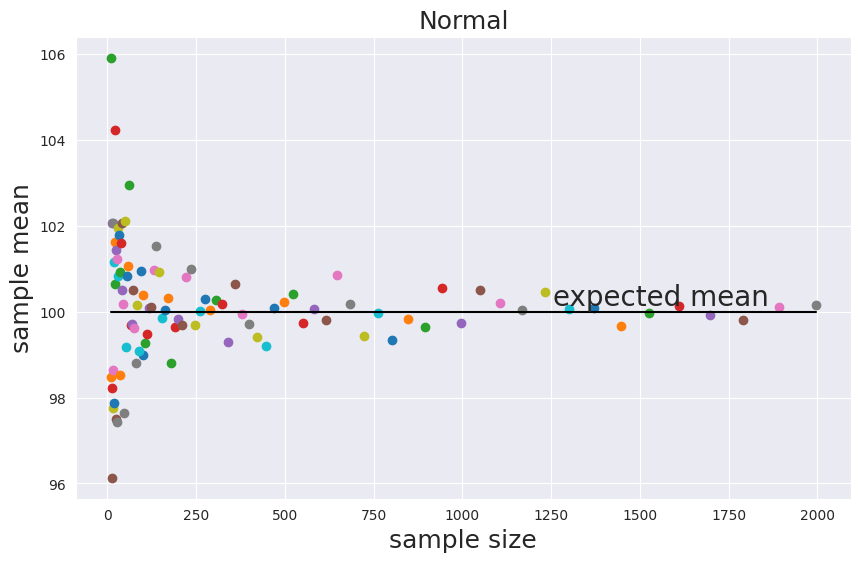

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['gaus'][n] = np.random.normal(loc=mymean, scale=10, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['gaus']['means'] = {}
# prepare the figure
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['gaus']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['gaus']['means'][nn] = mydists['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, mydists['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
axgaus_mu_n.set_title('Normal', fontsize=18)
axgaus_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axgaus_mu_n.text(axgaus_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

## Figure 4: This is a clear example of the law of large numbers because we can see that as the sample size increases, the sample mean is much closer to the expected mean (population mean). Very similar to the Chi Squared one.

Text(0.5, 1.0, 'Distribution of sample means for Normal Distribution samples')

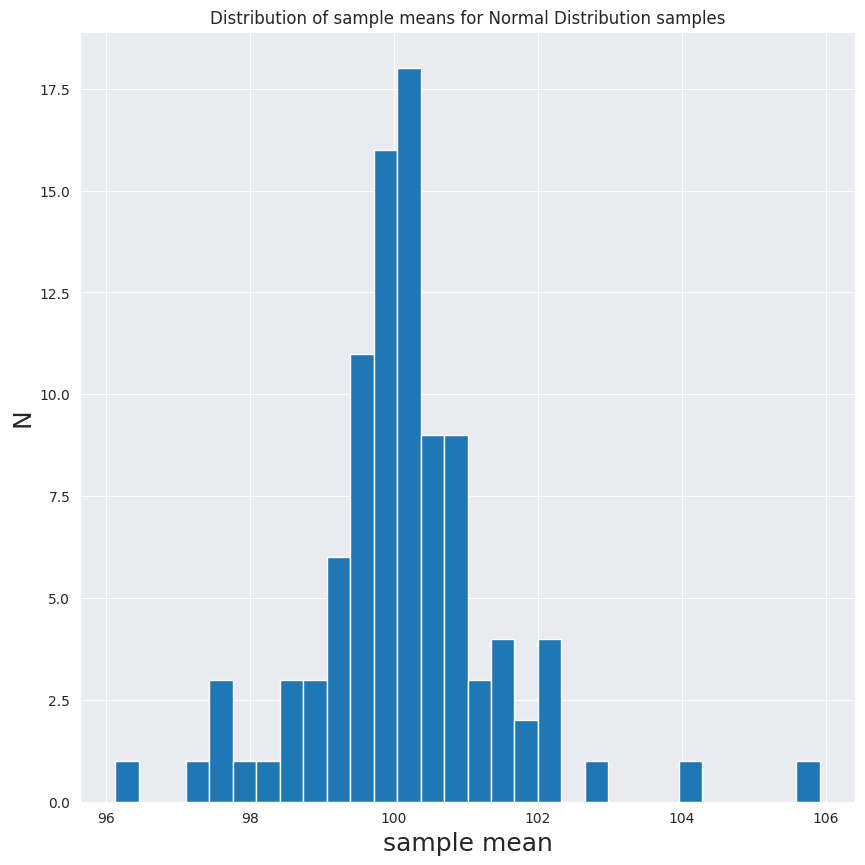

In [ ]:
allmeans_gaus = list(mydists['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_gaus,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Distribution of sample means for Normal Distribution samples")



## Figure 5: This shows that the sample means cluster around the population mean. This is a decently Gaussian shape, so it shows the Central Limit Theorem - as the number of samples increases, the sample mean approaches a normal (gaussian) distribution with mean of the population mean. Similar to the Chi Squared one as well.

# Do it for the Poisson distribution

Poisson mean: 101.77, standard deviation: 10.00


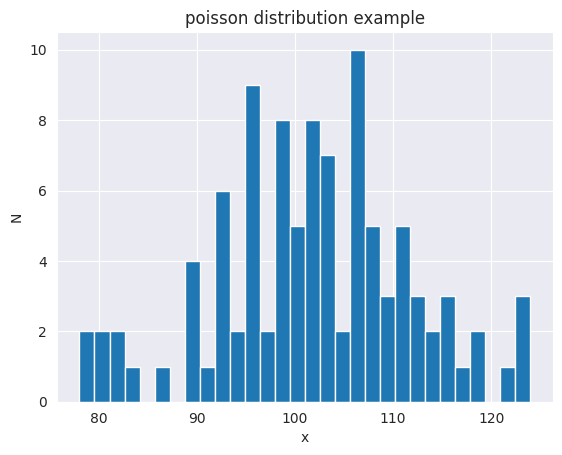

In [ ]:
mydists['pois'] = {}


mydists['pois'][100] = np.random.poisson(lam=100, size=100) #(loc=mymean, scale=10, size=100)

pl.hist(mydists['pois'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title("poisson distribution example");

#checking the mean and stdv for this one
print ("Poisson mean: %.2f, standard deviation: %.2f"%(mydists['pois'][100].mean(), mydists['pois'][100].std()))

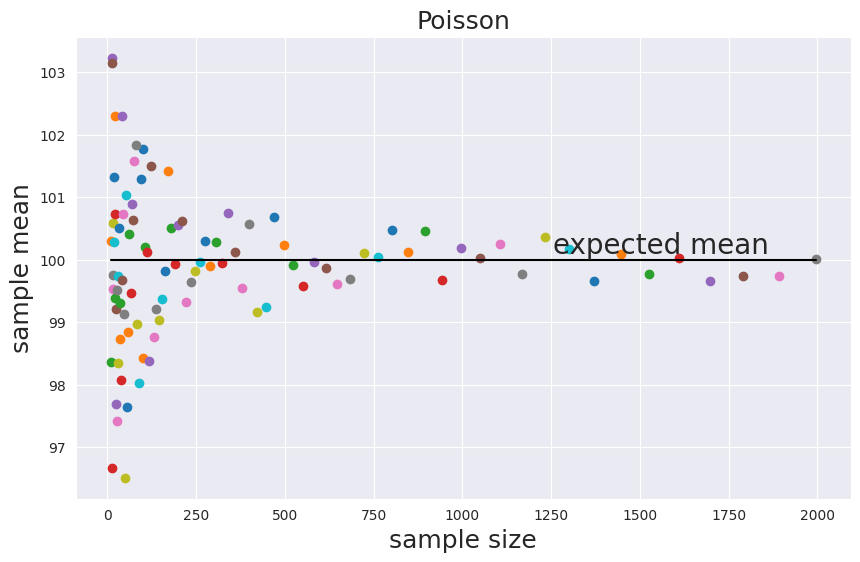

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['pois'][n] = np.random.poisson(lam=100, size=n)

# save the means for plotting later

mydists['pois']['means'] = {}
# prepare the figure
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['pois']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['pois']['means'][nn] = mydists['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, mydists['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('Poisson', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

## Figure 6: This is a clear example of the law of large numbers because we can see that as the sample size increases, the sample mean is much closer to the expected mean (population mean). Very similar to the previous ones.

Text(0.5, 1.0, 'Distribution of sample means for Poisson Distribution samples')

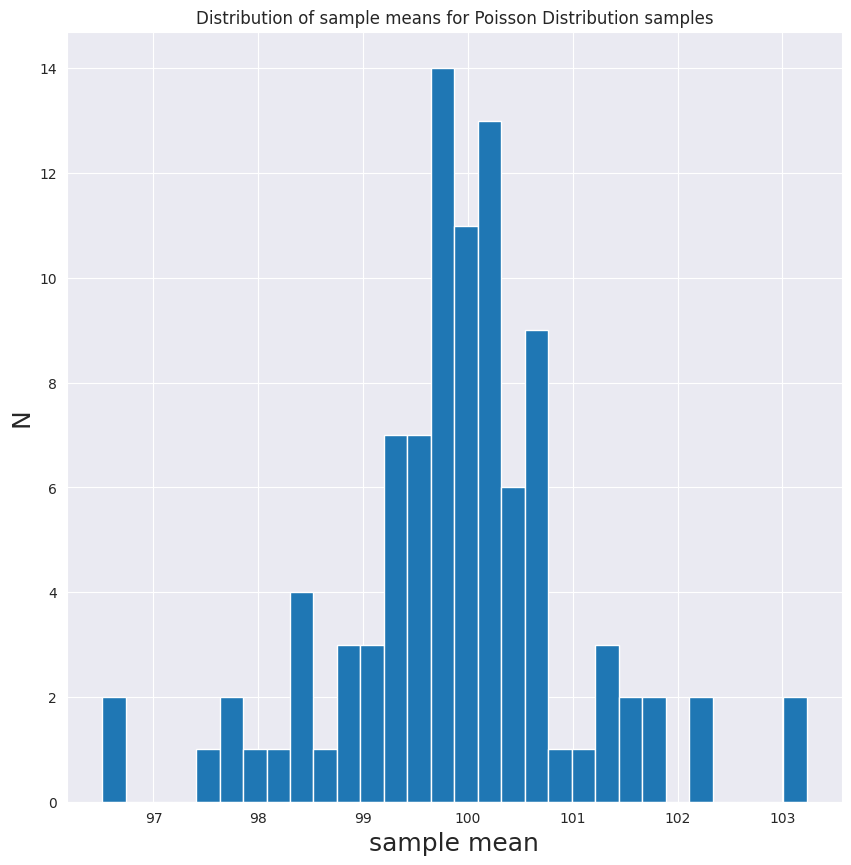

In [ ]:
allmeans_pois = list(mydists['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Distribution of sample means for Poisson Distribution samples")



## Figure 7: This shows that the sample means cluster around the population mean. This is kind of close to a gaussian shape (kind of), so it shows the Central Limit Theorem - as the number of samples increases, the sample mean approaches a normal (gaussian) distribution with mean of the population mean.

# Do it for the Binomial distribution

In [ ]:
np.random.binomial?

binomial mean: 100.71, standard deviation: 7.22


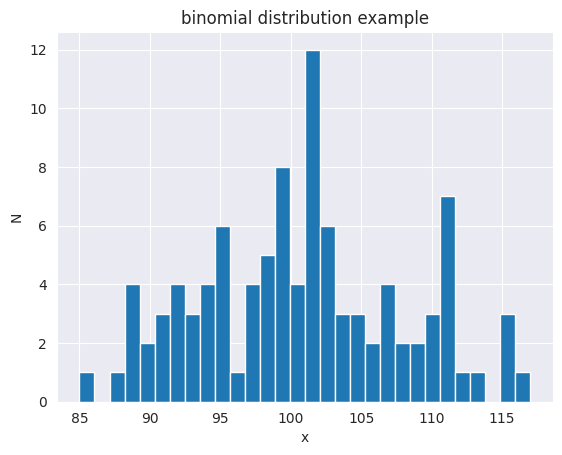

In [ ]:
mydists['binomial'] = {}

#setting that there are 200 trials with 50% chance of success
mydists['binomial'][100] = np.random.binomial(200, .5, size=100) #(loc=mymean, scale=10, size=100)

pl.hist(mydists['binomial'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title("binomial distribution example");

#checking the mean and stdv for this one
print ("binomial mean: %.2f, standard deviation: %.2f"%(mydists['binomial'][100].mean(), mydists['binomial'][100].std()))

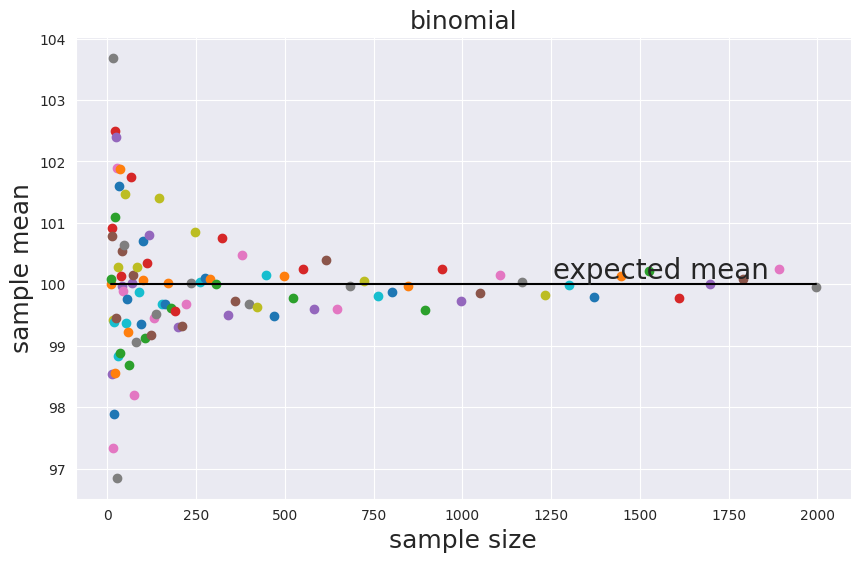

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['binomial'][n] = np.random.binomial(200, .5, size=n)

# save the means for plotting later

mydists['binomial']['means'] = {}
# prepare the figure
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binomial']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['binomial']['means'][nn] = mydists['binomial'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, mydists['binomial']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('binomial', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

## Figure 8: This is a clear example of the law of large numbers because we can see that as the sample size increases, the sample mean is much closer to the expected mean (population mean). Very similar to the previous ones.

Text(0.5, 1.0, 'Distribution of sample means for binomial distribution samples')

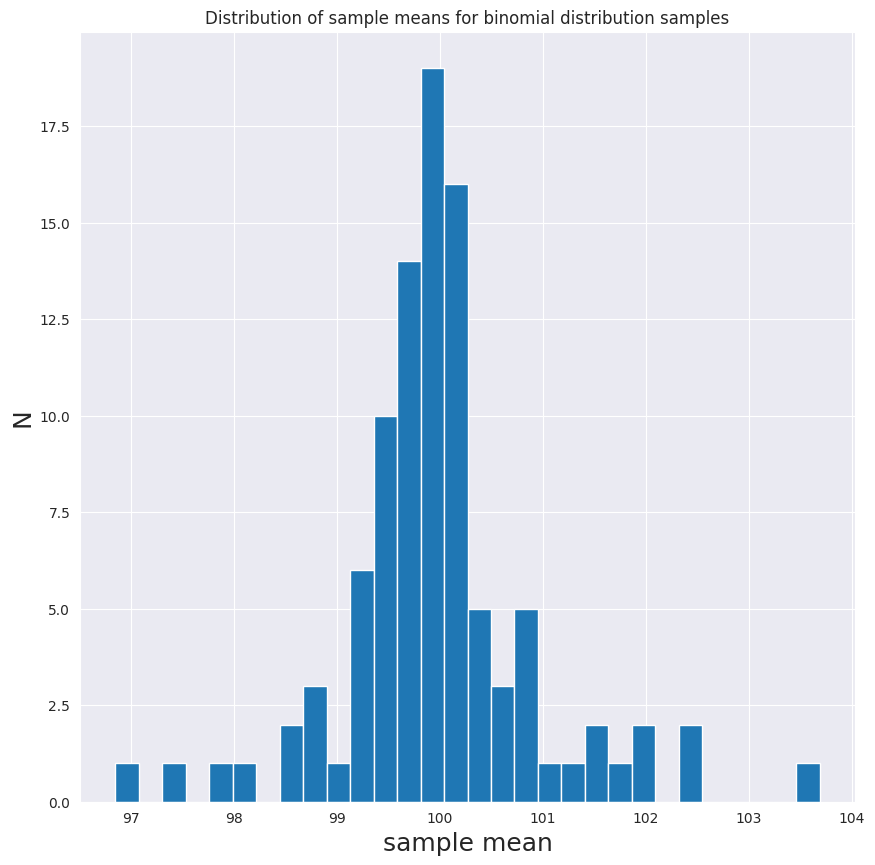

In [ ]:
allmeans_binomial = list(mydists['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binomial,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Distribution of sample means for binomial distribution samples")



## Figure 9: This shows that the sample means cluster around the population mean. This is somewhat close to a gaussian shape, so it shows the Central Limit Theorem - as the number of samples increases, the sample mean approaches a normal (gaussian) distribution with mean of the population mean.

# Do it for another distribution

In [ ]:
# mu, sigma = 3., 1. # mean and standard deviation
# s = np.random.lognormal(mu, sigma, 1000)
# s

In [ ]:
#np.random.lognormal(mean=100, sigma=.5, size=100)

log normal mean: 43387582584006330831743131652655508057227264.00, standard deviation: 69715935576501019720035120659293572394123264.00


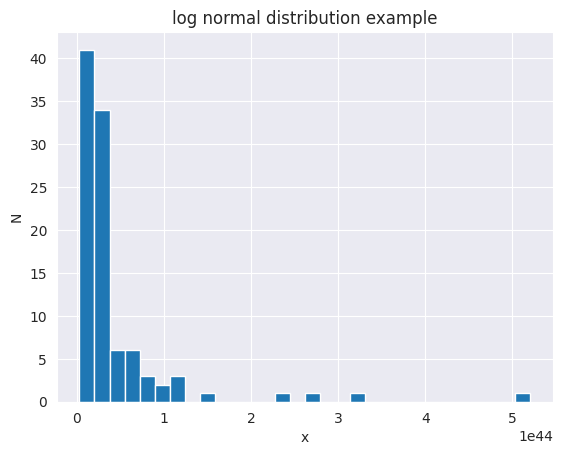

In [ ]:
mydists['lnorm'] = {}


mydists['lnorm'][100] = np.random.lognormal(mean=100, sigma=1, size=100)

pl.hist(mydists['lnorm'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title("log normal distribution example");

#checking the mean and stdv for this one
print ("log normal mean: %.2f, standard deviation: %.2f"%(mydists['lnorm'][100].mean(), mydists['lnorm'][100].std()))


these numbers do not check out but maybe that is because of the way that the distribution works...i will see if the law of large numbers and central limit theorem still hold!

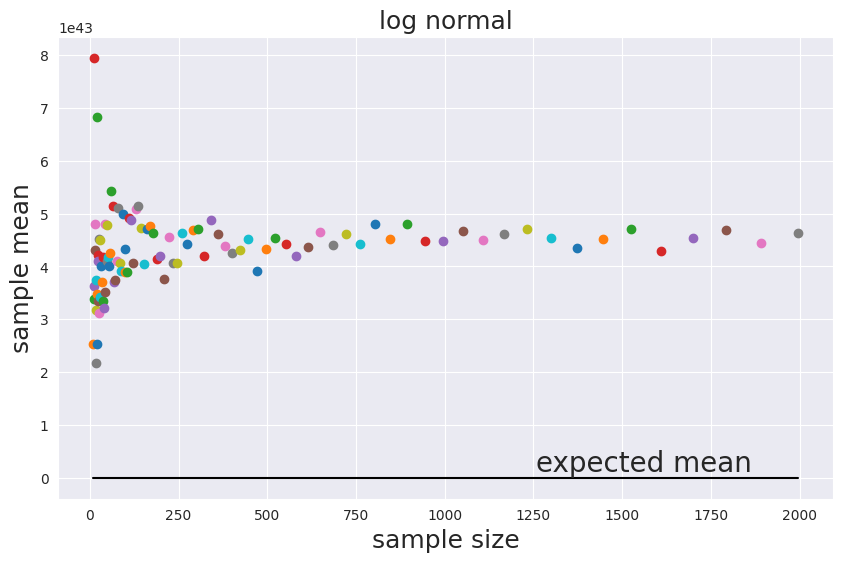

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['lnorm'][n] = np.random.lognormal(mean=100, sigma=1, size=n)

# save the means for plotting later

mydists['lnorm']['means'] = {}
# prepare the figure
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['lnorm']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['lnorm']['means'][nn] = mydists['lnorm'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, mydists['lnorm']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('log normal', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

## Figure 10: yeah, that didn't work! messing around with parameters...

log normal mean: 99.65, standard deviation: 131.49


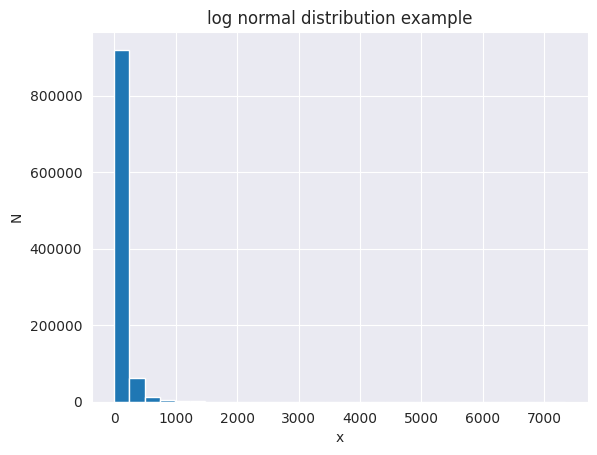

In [ ]:
mydists['lnorm'] = {}


mydists['lnorm'][100] = np.random.lognormal(mean=4.1, sigma=1, size=1000000)

pl.hist(mydists['lnorm'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title("log normal distribution example");

#checking the mean and stdv for this one
print ("log normal mean: %.2f, standard deviation: %.2f"%(mydists['lnorm'][100].mean(), mydists['lnorm'][100].std()))


Okay, so in order to get a mean of 100, we have to input the mean as 4.1. I made the sample size extremely big so I believe my guess-and-check here.

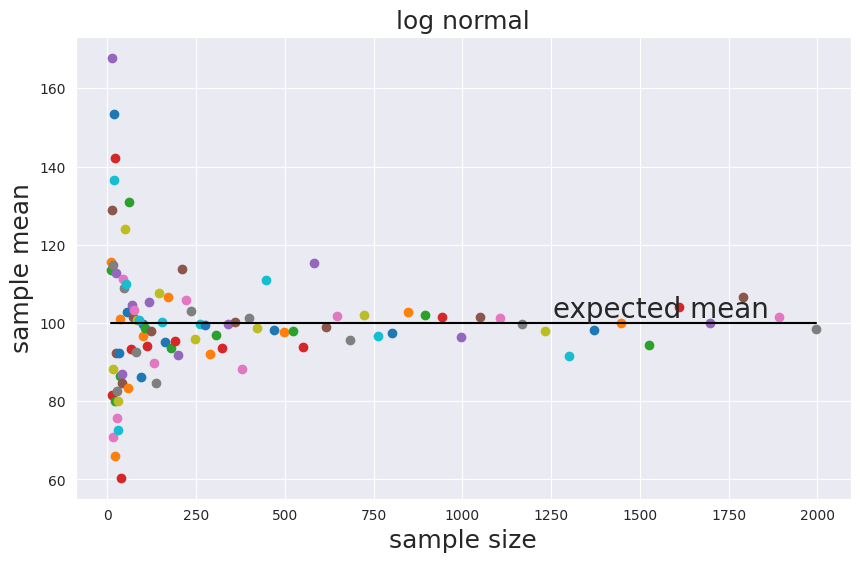

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['lnorm'][n] = np.random.lognormal(mean=4.1, sigma=1, size=n)

# save the means for plotting later

mydists['lnorm']['means'] = {}
# prepare the figure
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['lnorm']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['lnorm']['means'][nn] = mydists['lnorm'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, mydists['lnorm']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('log normal', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

## Figure 11: Fixed! Now this is a clear example of the law of large numbers because we can see that as the sample size increases, the sample mean is much closer to the expected mean (population mean). Very similar to the previous ones.

Text(0.5, 1.0, 'Distribution of sample means for log normal distribution samples')

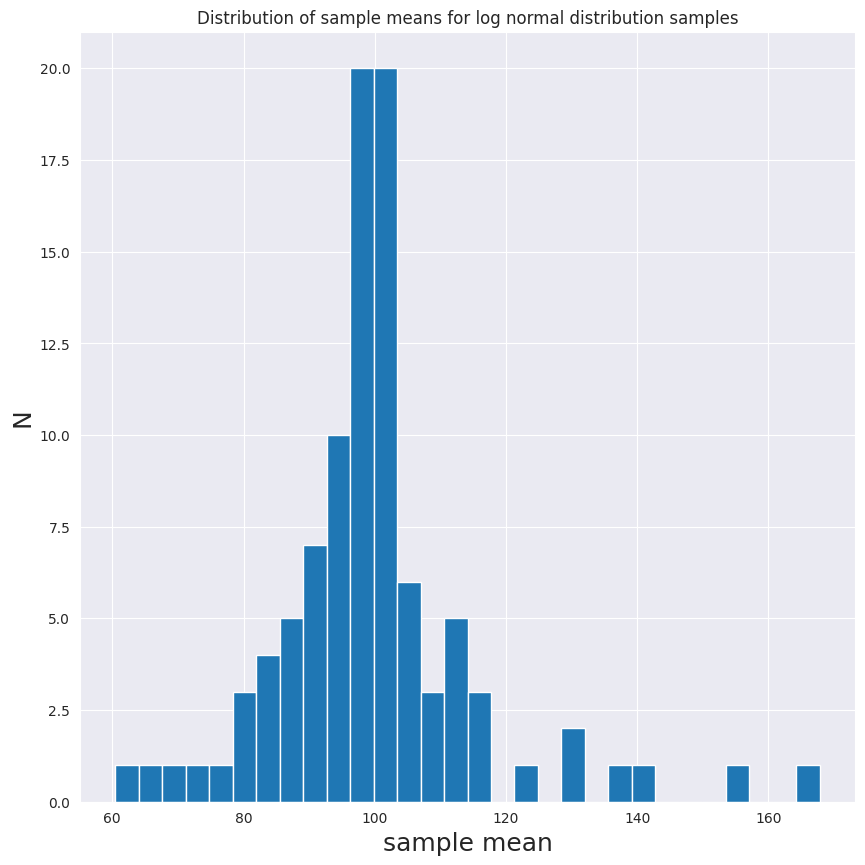

In [ ]:
allmeans_lnorm = list(mydists['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_lnorm,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Distribution of sample means for log normal distribution samples")



## Figure 12: This shows that the sample means cluster around the population mean. Even with this weird distribution, this is close to a gaussian shape, so it shows the Central Limit Theorem - as the number of samples increases, the sample mean approaches a normal (gaussian) distribution with mean of the population mean.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

Text(0.5, 1.0, 'means histogram')

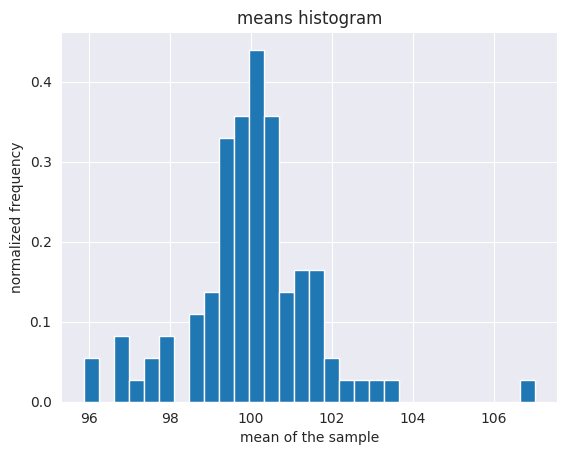

In [ ]:
height, bins, patch  = pl.hist(allmeans, bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("means histogram")

And you can create your own Gaussian function to pass to curve_fit as this for example:

In [ ]:
import numpy as np

In [ ]:
np.exp(2)

7.38905609893065

In [ ]:
def gaussian(x, mu, sigma): # this is the gaussian you will fit
  '''
  this is a gaussian
  inputs:
  mu = mean (float)
  sigma = standard deviation (float)
  x = values to input to the gaussian function
  return: value of the gaussian at x
  '''
  g = (1 / (sigma * np.sqrt(2 * np.pi)) ) * np.exp(-(((x-mu)/sigma)**2)/2)
  return g



Text(0.5, 1.0, 'checking out the gaussian')

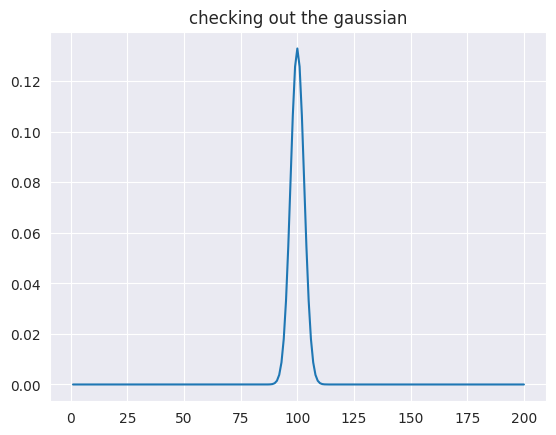

In [ ]:
vals=np.linspace(1,200,200)
plt.plot(vals,gaussian(vals, 100,3))
plt.title("checking out the gaussian")

figure: gaussian curve works yay

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [ ]:
bins

array([ 95.87891123,  96.25018728,  96.62146334,  96.9927394 ,
        97.36401546,  97.73529152,  98.10656758,  98.47784364,
        98.8491197 ,  99.22039576,  99.59167182,  99.96294788,
       100.33422394, 100.70549999, 101.07677605, 101.44805211,
       101.81932817, 102.19060423, 102.56188029, 102.93315635,
       103.30443241, 103.67570847, 104.04698453, 104.41826059,
       104.78953665, 105.1608127 , 105.53208876, 105.90336482,
       106.27464088, 106.64591694, 107.017193  ])

In [ ]:
len(bins)

31

In [ ]:
newbins = np.zeros(30)
for i in range(len(bins)-1):
  newbins[i] = (bins[i]+bins[i+1])/2

In [ ]:
newbins

array([ 96.06454926,  96.43582531,  96.80710137,  97.17837743,
        97.54965349,  97.92092955,  98.29220561,  98.66348167,
        99.03475773,  99.40603379,  99.77730985, 100.14858591,
       100.51986197, 100.89113802, 101.26241408, 101.63369014,
       102.0049662 , 102.37624226, 102.74751832, 103.11879438,
       103.49007044, 103.8613465 , 104.23262256, 104.60389862,
       104.97517468, 105.34645073, 105.71772679, 106.08900285,
       106.46027891, 106.83155497])

Text(0.5, 1.0, 'means histogram in line plot')

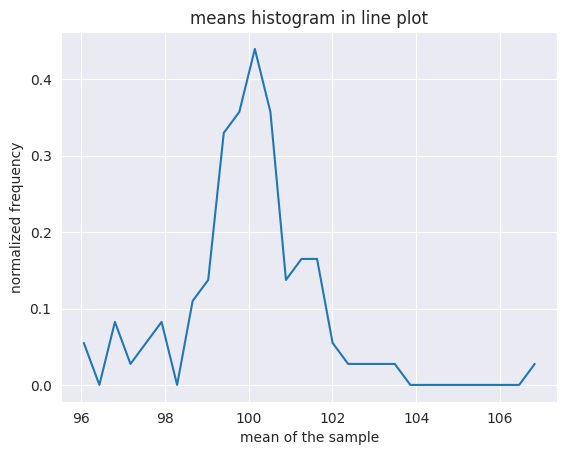

In [ ]:
plt.plot(newbins,height)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("means histogram in line plot")

figure: fixed the bins so that i have the center of each bin. plot looks like the shape of the histogram.

In [ ]:
# def tomin(params):
#   '''
#   this is the difference between the gaussian and the histogram
#   input: params: tuple of bins, mu, sigma as seen in gaussian function
#   output: value that is the difference between the two
#   '''
#   x=
#   gaussian(x)-
#   diff =

In [ ]:
from scipy import optimize

In [ ]:
curve_fit?

mean and sigma of the gaussian: 
[100.08530874   1.00572927]


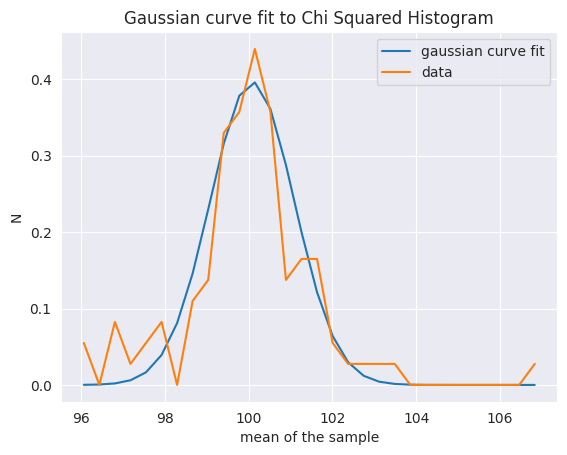

In [ ]:
popt, pcov = curve_fit(gaussian, newbins, height, p0=[101,1])
print("mean and sigma of the gaussian: ")
print(popt)
plt.plot(newbins, gaussian(newbins, popt[0], popt[1]),label='gaussian curve fit')
plt.plot(newbins,height,label='data')
pl.xlabel("mean of the sample")
pl.ylabel("N");
pl.title("Gaussian curve fit to Chi Squared Histogram")
plt.legend()

figure: this is a pretty good curve fit.

Text(0.5, 1.0, 'means histogram')

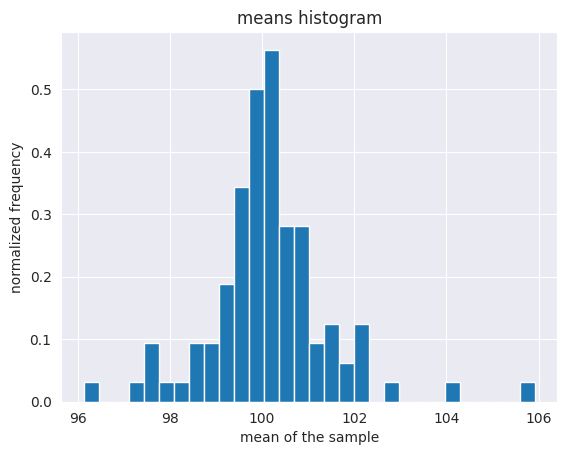

In [ ]:
height_g, bins, patch  = pl.hist(allmeans_gaus, bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("means histogram")

figure: here is the next histogram (normal distribution)

mean and sigma of the gaussian: 
[100.37521717   0.80402678]


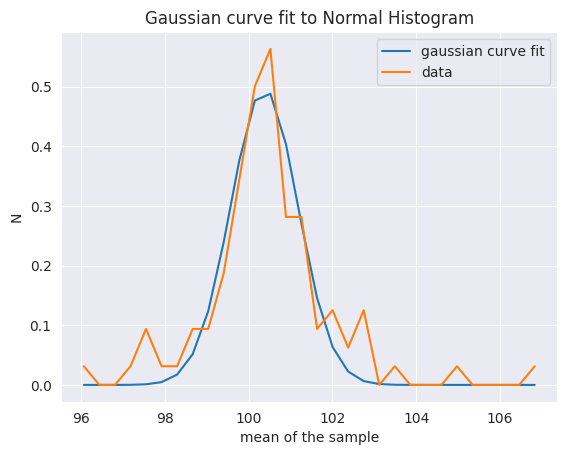

In [ ]:
popt, pcov = curve_fit(gaussian, newbins, height_g, p0=[101,1])
print("mean and sigma of the gaussian: ")
print(popt)
plt.plot(newbins, gaussian(newbins, popt[0], popt[1]),label='gaussian curve fit')
plt.plot(newbins,height_g,label='data')
pl.xlabel("mean of the sample")
pl.ylabel("N");
pl.title("Gaussian curve fit to Normal Histogram")
plt.legend()

figure: this curve fit also looks pretty good


Text(0.5, 1.0, 'means histogram')

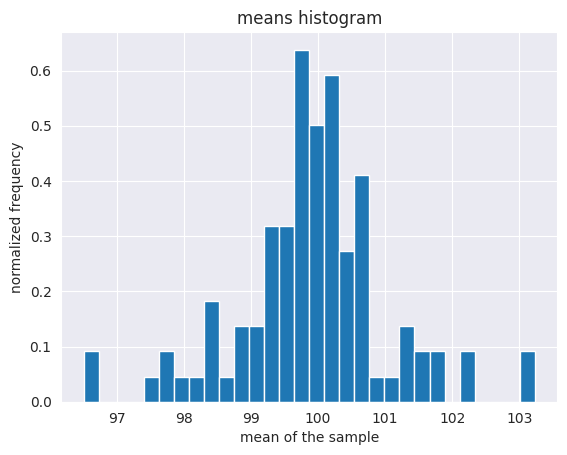

In [ ]:
height_p, bins, patch  = pl.hist(allmeans_pois, bins=30, density=True);
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("means histogram")

figure: here is the next histogram (poisson distribution)

mean and sigma of the gaussian: 
[101.60267708   0.78116356]


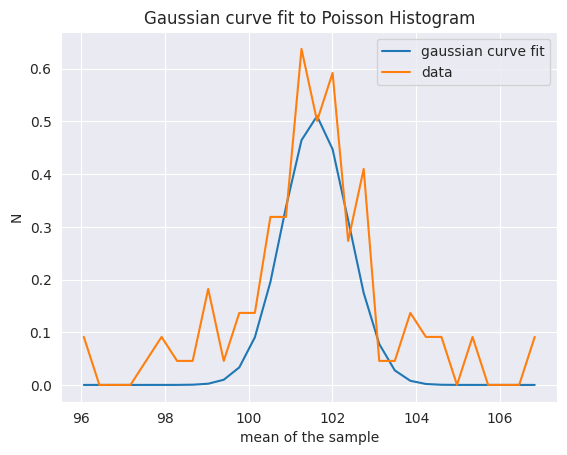

In [ ]:
popt, pcov = curve_fit(gaussian, newbins, height_p, p0=[101,1])
print("mean and sigma of the gaussian: ")
print(popt)
plt.plot(newbins, gaussian(newbins, popt[0], popt[1]),label='gaussian curve fit')
plt.plot(newbins,height_p,label='data')
pl.xlabel("mean of the sample")
pl.ylabel("N");
pl.title("Gaussian curve fit to Poisson Histogram")
plt.legend()

figure: even with the spikier data the curve fit seems okay

Text(0.5, 1.0, 'means histogram')

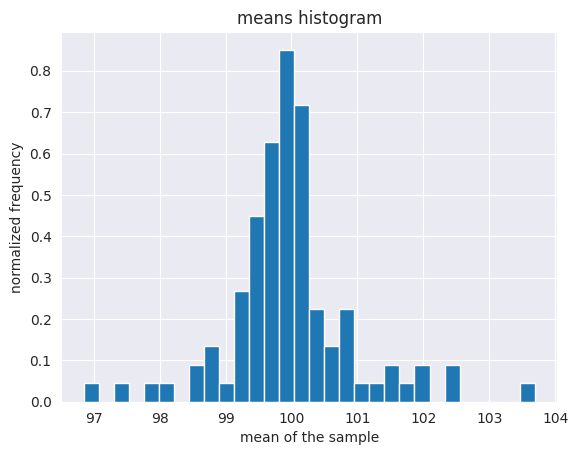

In [ ]:
height_b, bins, patch  = pl.hist(allmeans_binomial, bins=30, density=True);
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("means histogram")

figure: here is the next histogram (binomial distribution)

mean and sigma of the gaussian: 
[100.84018825   0.53325829]


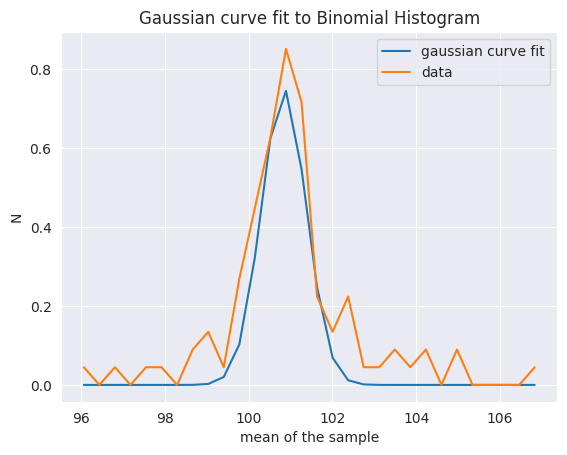

In [ ]:
popt, pcov = curve_fit(gaussian, newbins, height_b, p0=[101,1])
print("mean and sigma of the gaussian: ")
print(popt)
plt.plot(newbins, gaussian(newbins, popt[0], popt[1]),label='gaussian curve fit')
plt.plot(newbins,height_b,label='data')
pl.xlabel("mean of the sample")
pl.ylabel("N");
pl.title("Gaussian curve fit to Binomial Histogram")
plt.legend()

figure: that's a good fit. note that the sigma is changing between all of these

Text(0.5, 1.0, 'means histogram')

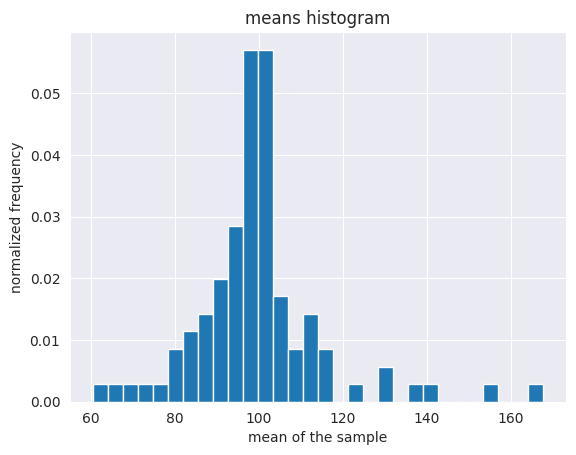

In [ ]:

height_l, bins, patch  = pl.hist(allmeans_lnorm, bins=30, density=True);
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
pl.title("means histogram")

figure: here is the next histogram (log normal distribution)

mean and sigma of the gaussian: 
[80.43573158 14.18859493]


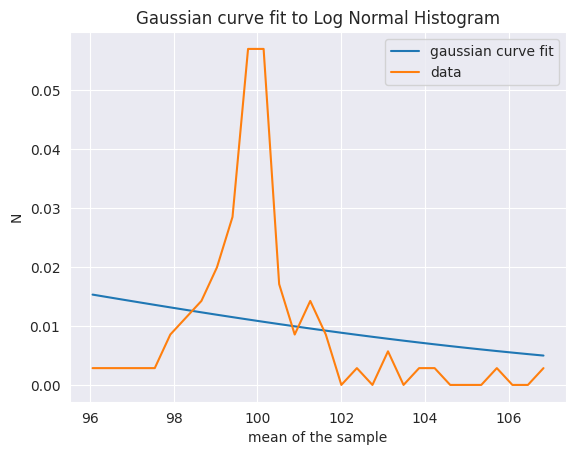

In [ ]:
popt, pcov = curve_fit(gaussian, newbins, height_l, p0=[99,.2])
print("mean and sigma of the gaussian: ")
print(popt)
plt.plot(newbins, gaussian(newbins, popt[0], popt[1]),label='gaussian curve fit')
plt.plot(newbins,height_l,label='data')
pl.xlabel("mean of the sample")
pl.ylabel("N");
pl.title("Gaussian curve fit to Log Normal Histogram")
plt.legend()

caption: fit does not look good. suspect it is because the log normal distribution is a funky beast

# <mark>WFF</mark> Well Done!